In [1]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 특정 조건의 데이터만 사용하기
* person_rn 사용자번호의 unique() 값이 5이상인 데이터만 훈련
* 즉, 한 사람의 사용 컨텐츠가 5개이상인 사람만 데이터로 사용하기
* nb, combine, cardinality

In [2]:
# 제출 점수 : 0.6098639832(2021-12-15 14:47:13)

# 데이터 불러오기

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [5]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [7]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

모델 학습시 id, contents_open_dt 제거하고 진행

In [8]:
train = train.drop(['id', 'contents_open_dt'], axis=1) 
test = test.drop(['id', 'contents_open_dt'], axis=1)

In [9]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0


## 한 사람의 사용 컨텐츠 수가 5개 이상인 데이터 추출

### train set

In [10]:
train_person_rn = train.person_rn.value_counts()
train_person_rn = train_person_rn.reset_index()
train_person_rn_above = train_person_rn[train_person_rn['person_rn'] >= 5]
train_person_rn_above.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12034 entries, 0 to 12033
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   index      12034 non-null  int64
 1   person_rn  12034 non-null  int64
dtypes: int64(2)
memory usage: 282.0 KB


In [11]:
train_above = pd.DataFrame()
for index in tqdm(train_person_rn_above['index'].unique()):
    tmp = train[train['person_rn']==index]
    train_above = pd.concat([train_above, tmp], ignore_index=True)

100%|██████████| 12034/12034 [01:09<00:00, 173.48it/s]


In [12]:
train_above.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
0,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,1151,756,5,4,108,627445,414363,1
1,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,2,5,1,3,2,361,978,2,5,139,627445,357354,0
2,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,749,95,2,3,139,627445,358408,1
3,False,False,False,False,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,702,750,5,4,22,627445,107394,1
4,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,1,3,5,1,1,2,1805,38,1,4,127,627445,425267,1


In [13]:
train_above.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75278 entries, 0 to 75277
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            75278 non-null  bool 
 1   d_m_match_yn            75278 non-null  bool 
 2   d_s_match_yn            75278 non-null  bool 
 3   h_l_match_yn            75278 non-null  bool 
 4   h_m_match_yn            75278 non-null  bool 
 5   h_s_match_yn            75278 non-null  bool 
 6   person_attribute_a      75278 non-null  int64
 7   person_attribute_a_1    75278 non-null  int64
 8   person_attribute_b      75278 non-null  int64
 9   person_prefer_c         75278 non-null  int64
 10  person_prefer_d_1       75278 non-null  int64
 11  person_prefer_d_2       75278 non-null  int64
 12  person_prefer_d_3       75278 non-null  int64
 13  person_prefer_e         75278 non-null  int64
 14  person_prefer_f         75278 non-null  int64
 15  person_prefer_g    

#### person_rn, contents_rn 열 제거

In [14]:
train_above = train_above.drop(['person_rn', 'contents_rn'], axis=1)
train_above.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
0,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,1151,756,5,4,108,1
1,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,2,5,1,3,2,361,978,2,5,139,0
2,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,749,95,2,3,139,1
3,False,False,False,False,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,3,3,5,1,1,2,702,750,5,4,22,1
4,False,False,False,True,False,False,1,6,2,5,372,978,966,7,1,1,95,4,59,1,3,5,1,1,2,1805,38,1,4,127,1


# 모델 학습/예측

In [15]:
ex = setup(train_above, target='target', n_jobs=3, session_id=0, silent=True, combine_rare_levels=True, fold=5, fold_shuffle=True, 
categorical_features=['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h'],
high_cardinality_features=['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h'])

,Description,Value
0,session_id,0
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(75278, 31)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,True


In [16]:
compare_models(sort='F1')
# 4m 20s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5470,0.5943,0.8166,0.5232,0.6377,0.1051,0.1251,0.1580
catboost,CatBoost Classifier,0.6326,0.6846,0.6310,0.6220,0.6264,0.2650,0.2651,11.4800
xgboost,Extreme Gradient Boosting,0.6278,0.6778,0.6232,0.6177,0.6205,0.2553,0.2553,5.9800
lightgbm,Light Gradient Boosting Machine,0.6188,0.6676,0.6129,0.6089,0.6108,0.2373,0.2373,0.8320
rf,Random Forest Classifier,0.6247,0.6736,0.5929,0.6211,0.6067,0.2482,0.2484,5.3240
gbc,Gradient Boosting Classifier,0.6034,0.6476,0.5952,0.5936,0.5943,0.2064,0.2064,7.5360
et,Extra Trees Classifier,0.6077,0.6518,0.5791,0.6021,0.5904,0.2142,0.2143,7.0720
ada,Ada Boost Classifier,0.5980,0.6381,0.5881,0.5883,0.5882,0.1955,0.1955,1.8180
ridge,Ridge Classifier,0.5866,0.0000,0.5686,0.5778,0.5731,0.1723,0.1724,0.1340
lda,Linear Discriminant Analysis,0.5865,0.6254,0.5686,0.5778,0.5731,0.1722,0.1723,0.9320


GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5427,0.5929,0.8267,0.5200,0.6384,0.0972,0.1181
1,0.5502,0.6000,0.8280,0.5250,0.6425,0.1118,0.1346
2,0.5493,0.5892,0.7878,0.5256,0.6305,0.1083,0.1236
3,0.5437,0.5909,0.8212,0.5207,0.6373,0.0989,0.1190
4,0.5493,0.5986,0.8196,0.5246,0.6397,0.1095,0.1304
Mean,0.5470,0.5943,0.8166,0.5232,0.6377,0.1051,0.1251
SD,0.0032,0.0042,0.0148,0.0023,0.0040,0.0059,0.0064


In [18]:
pred = predict_model(nb, test)

In [19]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,Label,Score
0,True,False,False,True,True,True,1,1,2,1,...,2,1147,839,1,5,263,393790,236865,0,0.5366
1,False,False,False,True,False,False,2,0,2,2,...,2,1611,278,1,4,263,394058,236572,1,0.9999
2,True,False,False,True,True,True,2,3,2,1,...,2,1817,490,3,4,177,1002061,704612,0,0.9999
3,True,False,False,True,True,True,1,2,2,5,...,2,101,150,5,3,177,1000813,704652,1,0.9024
4,True,False,False,True,False,False,1,6,4,5,...,1,985,1097,1,4,177,111146,704413,0,0.7599


In [20]:
pred.iloc[:,-2:].head()

,Label,Score
0,0,0.5366
1,1,0.9999
2,0,0.9999
3,1,0.9024
4,0,0.7599


# 제출파일 생성

In [21]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver0.4.csv', index=False)

# 모델 분석 그래프

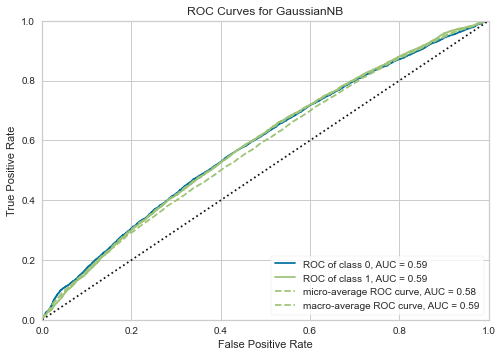

In [22]:
plot_model(nb)